# Airlines Time Series Analysis

In [1]:
# Libraries for pycaret
from pycaret.datasets import get_data
from pycaret.time_series import *

## Load Airline Dataset

In [2]:
# Load dataset airline
data = get_data('airline')

Period
1949-01    112.0
1949-02    118.0
1949-03    132.0
1949-04    129.0
1949-05    121.0
Freq: M, Name: Number of airline passengers, dtype: float64

Getting airline dataset from pycaret's dataset.

In [3]:
print(data)

Period
1949-01    112.0
1949-02    118.0
1949-03    132.0
1949-04    129.0
1949-05    121.0
           ...  
1960-08    606.0
1960-09    508.0
1960-10    461.0
1960-11    390.0
1960-12    432.0
Freq: M, Name: Number of airline passengers, Length: 144, dtype: float64


Based on information, the dataset have 144 entries with data type float. Then, the dataset also only 2 column, such as datetime and number of passenger.

<Axes: xlabel='Period'>

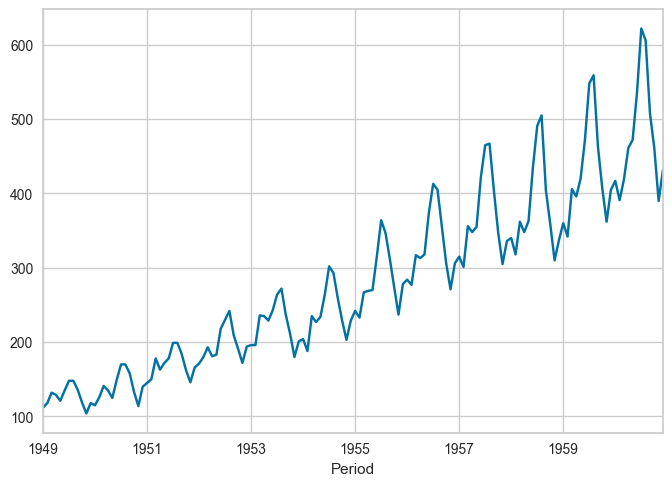

In [4]:
# Check for patterns using plot
data.plot()

If we look at the trend using a plot, the trend tends to increase from 1949 to 1959. This indicates that airline passengers experienced passenger growth during that period of years.

In [5]:
# Import pandas library for dataframe
import pandas as pd

df = pd.DataFrame(data)
df

,Number of airline passengers
Period,
1949-01,112.0
1949-02,118.0
1949-03,132.0
1949-04,129.0
1949-05,121.0
...,...
1960-08,606.0
1960-09,508.0
1960-10,461.0


In [6]:
# Import matplotlib and seaborn for visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Adding data month
df['Month'] = df.index.month

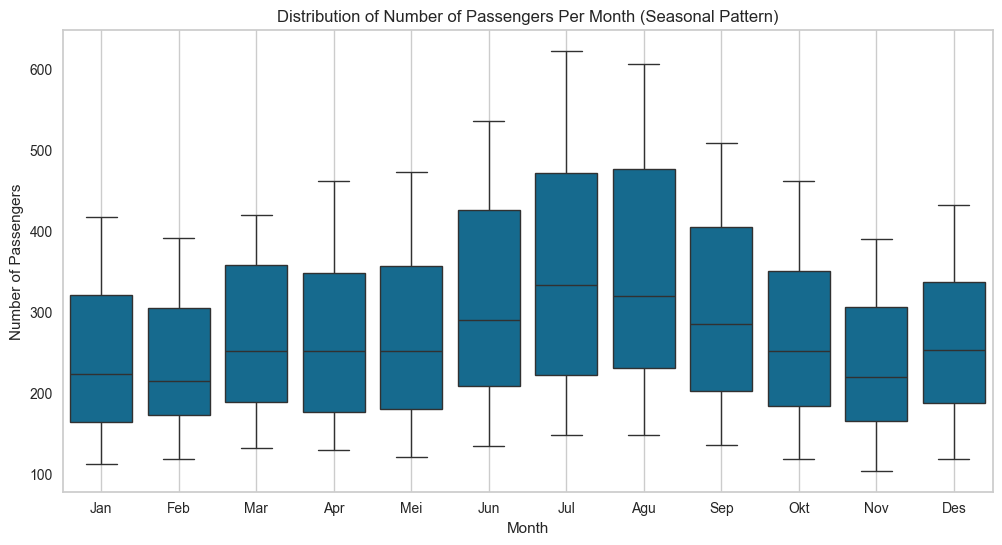

In [7]:
# Plot average number of passengers per month
plt.figure(figsize=(12,6))
sns.boxplot(x='Month', y='Number of airline passengers', data=df)
plt.title("Distribution of Number of Passengers Per Month (Seasonal Pattern)")
plt.xlabel("Month")
plt.ylabel("Number of Passengers")
plt.xticks(ticks=range(12), labels=["Jan", "Feb", "Mar", "Apr", "Mei", "Jun", "Jul", "Agu", "Sep", "Okt", "Nov", "Des"])
plt.grid()
plt.show()

Although the passenger trend has an upward pattern, there is also a seasonal pattern of passengers on airlines. The significant increase in the number of passengers occurs in June, July, and August each year. This pattern is consistent throughout the data period, indicating that these months are the peak times for airlines to accommodate passengers.

## Data Preparation

In [ ]:
# Setup for parameter model for the next 3 period
s =  setup(data, fh=3, session_id=123)

,Description,Value
0,session_id,123
1,Target,Number of airline passengers
2,Approach,Univariate
3,Exogenous Variables,Not Present
4,Original data shape,"(144, 1)"
5,Transformed data shape,"(144, 1)"
6,Transformed train set shape,"(141, 1)"
7,Transformed test set shape,"(3, 1)"
8,Rows with missing values,0.0%
9,Fold Generator,ExpandingWindowSplitter


In [7]:
# Check for statistic
check_stats()

,Test,Test Name,Data,Property,Setting,Value
0,Summary,Statistics,Transformed,Length,,144.0
1,Summary,Statistics,Transformed,# Missing Values,,0.0
2,Summary,Statistics,Transformed,Mean,,280.298611
3,Summary,Statistics,Transformed,Median,,265.5
4,Summary,Statistics,Transformed,Standard Deviation,,119.966317
5,Summary,Statistics,Transformed,Variance,,14391.917201
6,Summary,Statistics,Transformed,Kurtosis,,-0.364942
7,Summary,Statistics,Transformed,Skewness,,0.58316
8,Summary,Statistics,Transformed,# Distinct Values,,118.0
9,White Noise,Ljung-Box,Transformed,Test Statictic,"{'alpha': 0.05, 'K': 24}",1606.083817


Conclusion from check_stats result

1. The dataset has no missing values and has 118 unique values.

2. The data is not white noise (therefore there is pattern in the data).

3. The data isn't stasionary (ADF Test), it may contain trend.

4. The data isn't normal distribution (because the dataset has a trend).

## Training Model

In [8]:
# Compare baseline models
best = compare_models()

,Model,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2,TT (Sec)
stlf,STLF,0.4136,0.4530,12.7373,15.8272,0.0262,0.0261,0.2016,0.0400
ets,ETS,0.4912,0.5541,15.0942,19.3101,0.0318,0.0316,-0.4465,0.0833
exp_smooth,Exponential Smoothing,0.4929,0.5560,15.1471,19.3780,0.0320,0.0317,-0.4604,0.0733
arima,ARIMA,0.6964,0.7110,21.3757,24.7774,0.0447,0.0456,-0.5495,0.1367
auto_arima,Auto ARIMA,0.7136,0.6945,21.9389,24.2138,0.0459,0.0464,-0.5454,5.9167
huber_cds_dt,Huber w/ Cond. Deseasonalize & Detrending,0.8658,0.8362,26.7826,29.3947,0.0516,0.0536,0.1501,0.0667
lr_cds_dt,Linear w/ Cond. Deseasonalize & Detrending,0.8904,0.8722,27.5266,30.6243,0.0534,0.0555,-0.0092,0.3567
ridge_cds_dt,Ridge w/ Cond. Deseasonalize & Detrending,0.8905,0.8722,27.5270,30.6246,0.0534,0.0555,-0.0092,0.3067
en_cds_dt,Elastic Net w/ Cond. Deseasonalize & Detrending,0.8944,0.8746,27.6535,30.7127,0.0535,0.0557,-0.0063,0.3500
lasso_cds_dt,Lasso w/ Cond. Deseasonalize & Detrending,0.8966,0.8759,27.7231,30.7594,0.0536,0.0558,-0.0040,0.3000


Conclusion based on compared model

1. The best model based on Mean Absolute Scaled Error (MASE lower than the other models) and Root Mean Squared Scaled Error (RMSSE lower than other models) and Root Mean Squared Error (RMSE lower than other models) is STLF. It means that STLF model has a low predictive error relative to actual value.

2. Regression-based models (Ridge, Lasso, Elastic Net) have quite good performance.

3. Decision tree-based models (XGBoost, Random Forest, LightGBM) are less suitable for time series forecasting than statistical models.

4. Grand Means and Croston have poor performance (very large errors).

## Model Evaluation

In [ ]:
# Plot forecast
plot_model(best, plot = 'forecast')

In [10]:
# forecast plot for the next 36 months
plot_model(best, plot = 'forecast', data_kwargs={'fh' : 36})

From the diagram, we can see that our model can predict trends and seasonality quite well according to the data patterns in the dataset. So, we can use this model with confidence.

In [11]:
# insample plot
plot_model(best, plot = 'insample')

Based on the sample plot results, we can also see that the model can capture the upward trend and also the seasonality of the data. In addition, the model can also follow the peak and valley points. This shows that the model is effective in learning patterns from the existing data.

In [12]:
# residuals plot
plot_model(best, plot = 'residuals')

Based on the residual value, it can be seen that the residual is relatively small compared to the actual data, indicating that the model is quite accurate in predicting the data. In addition, the residual also has consistent variability throughout the period.

## Conclusion

The airline dataset shows an increasing trend every year and has a monthly seasonal trend, such as a significant increase in the number of passengers in June, July, and August.



The Short Term Load Forecasting model is the model chosen to predict airline passenger trend patterns compared to other models. This is because the model has a Mean Absolute Scaled Error (MASE is lower than other models) and Root Mean Squared Scaled Error (RMSSE is lower than other models) and Root Mean Squared Error (RMSE is lower than other models) which are STLF. This means that the STLF model has a low prediction error relative to the actual value.

Thus, airlines can create marketing strategies in certain months to maximize airline revenue, such as creating promotions in the summer months (June, July, and August) to attract passengers to use airline services for travel or optimize capacity.